# **Exercício 13 - CNN**

Aluno: Giovanni Martins de Sá Júnior - 2017001850

Neste exercício, foi utilizada uma implementação de uma arquitetura CNN feita em R disponibilizada pelo professor. Nesse sentido, o algoritmo foi ajustado para o Python, e nele, foram experimentadas algumas alterações em sua implementação, pegando como inspiração, alguns dos artigos listados na própria tarefa.

A partir disso, primeiramente foi então modificado a arquitetura da CNN, modificando-se a largura do número de filtros, para permitir que fossem buscadas mais características complexas nos primeiros estágios. Em segundo, aumentou-se a profundidade dos filtros, no intuito de aumentar a capacidade em aprender representações mais ricas. E por último ajustou-se o tamanho do kernel para que a rede capture padrões espaciais mais amplos.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Carregar o conjunto de dados MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


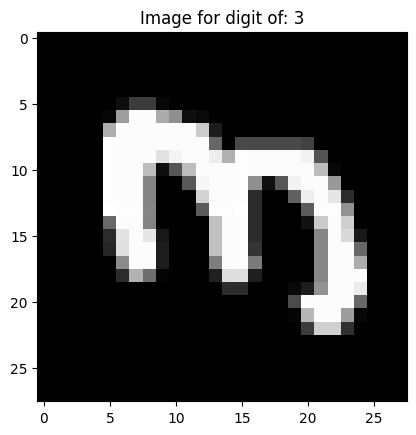

In [ ]:
# Visualizar uma imagem
index_image = 7  # Altere este índice para ver diferentes imagens
input_matrix = x_train[index_image, :, :]
output_matrix = np.apply_along_axis(np.flip, 1, input_matrix)
output_matrix = np.transpose(output_matrix)
plt.imshow(output_matrix, cmap='gray')
plt.title(f'Image for digit of: {y_train[index_image]}')
plt.show()

In [ ]:
# Parâmetros
batch_size = 64
num_classes = 10
epochs = 5

In [ ]:
# Dimensões da imagem de entrada
img_rows, img_cols = 28, 28

In [ ]:
# Reformular os dados
x_train = x_train.reshape((x_train.shape[0], img_rows, img_cols, 1))
x_test = x_test.reshape((x_test.shape[0], img_rows, img_cols, 1))
input_shape = (img_rows, img_cols, 1)

In [ ]:
# Escala para estabilidade numérica
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Converter rótulos para matrizes categóricas
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Definir a estrutura do modelo CNN
cnn_model = models.Sequential([
    layers.Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=input_shape),
    # Aumentei a largura para 16, usando kernel_size (5, 5)
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    # Aumentei a profundidade dos filtros para 32
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 800)              

In [ ]:
# Compilar o modelo
cnn_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adadelta(),
    metrics=['accuracy']
)


In [ ]:
# Treinar o modelo
cnn_history = cnn_model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2
)


Epoch 1/5
750/750 [==============================] - 35s 43ms/step - loss: 2.3421 - accuracy: 0.0982 - val_loss: 2.3075 - val_accuracy: 0.0627
Epoch 2/5
750/750 [==============================] - 31s 41ms/step - loss: 2.3275 - accuracy: 0.1026 - val_loss: 2.2956 - val_accuracy: 0.0808
Epoch 3/5
750/750 [==============================] - 35s 47ms/step - loss: 2.3142 - accuracy: 0.1102 - val_loss: 2.2861 - val_accuracy: 0.1168
Epoch 4/5
750/750 [==============================] - 32s 43ms/step - loss: 2.3068 - accuracy: 0.1134 - val_loss: 2.2780 - val_accuracy: 0.1675
Epoch 5/5
750/750 [==============================] - 32s 42ms/step - loss: 2.2987 - accuracy: 0.1210 - val_loss: 2.2709 - val_accuracy: 0.2268


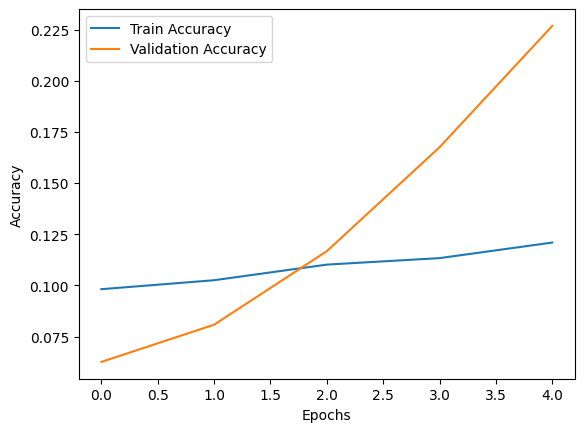

In [ ]:
# Plotar a curva de aprendizado
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Avaliar o modelo
cnn_model.evaluate(x_test, y_test)

# Previsões do modelo
cnn_pred = cnn_model.predict(x_test)
print(cnn_pred[:50])

313/313 [==============================] - 2s 6ms/step
[[0.0936554  0.0950572  0.09112116 0.10223257 0.11232971 0.10378505
  0.1029211  0.10721803 0.10046658 0.09121314]
 [0.09725788 0.10594968 0.09637022 0.09751301 0.09778313 0.10430496
  0.10869116 0.10856127 0.09332936 0.09023935]
 [0.10031069 0.10426235 0.09633014 0.09779631 0.09965014 0.10312151
  0.10039826 0.10360531 0.09768352 0.09684183]
 [0.10996898 0.09721649 0.09222211 0.10460191 0.08958466 0.10711527
  0.11287319 0.10113019 0.09820816 0.08707891]
 [0.09821337 0.09662624 0.10006981 0.09984751 0.1067332  0.10593085
  0.09575544 0.10280466 0.10081811 0.0932008 ]
 [0.09736553 0.10416796 0.09449164 0.09737861 0.09902459 0.10509311
  0.09791905 0.1056854  0.1023325  0.09654159]
 [0.09163772 0.09352645 0.09450037 0.10083631 0.11440562 0.1033878
  0.10077804 0.10288773 0.10811178 0.08992808]
 [0.09298588 0.09689637 0.09808706 0.09682368 0.10047119 0.10816243
  0.10025283 0.10730525 0.0985758  0.10043946]
 [0.09887483 0.0933245  0.

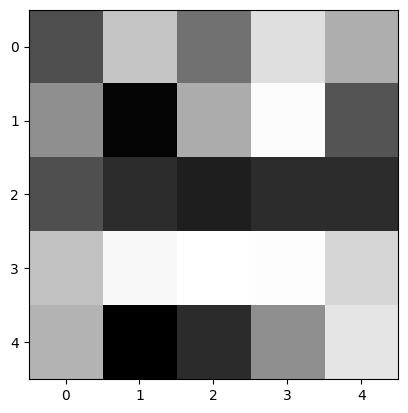

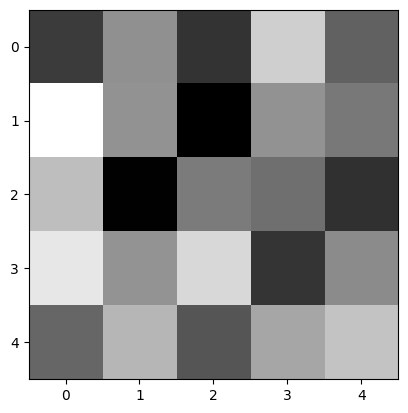

In [ ]:
# Obter pesos do modelo
w = cnn_model.get_weights()

# Plotar filtros
plt.imshow(w[0][:, :, 0, 0], cmap='gray')  # Para plotar o filtro 1 da camada 1
plt.show()

plt.imshow(w[0][:, :, 0, 2], cmap='gray')  # Para plotar o filtro 3 da camada 1
plt.show()